In [1]:
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [3]:
print('x_train: ', x_train.shape)
print('y_train: ', y_train.shape)

x_train:  (50000, 32, 32, 3)
y_train:  (50000, 1)


In [4]:
K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
print('Noof classes:',K)
print('Noof training images:',Ntr)
print('Noof test images:',Nte)
print('Noof features:',Din)
# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

Noof classes: 10
Noof training images: 50000
Noof test images: 10000
Noof features: 3072


In [5]:
print('original labels:',y_train.shape)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
print('labels in class matrix:',y_train.shape)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

original labels: (50000, 1)
labels in class matrix: (50000, 10)


In [6]:
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
print('x_train:', x_train.shape)
print('x_test:', x_test.shape)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train: (50000, 3072)
x_test: (10000, 3072)


In [7]:
std=1e-5
w1 = std*np.random.randn(Din, K)
b1 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)
print('w1:',w1)

w1: (3072, 10)
b1: (10,)
w1: [[-7.70398178e-06 -4.98834216e-07  5.43238390e-06 ...  8.26696009e-07
  -8.75256121e-07  7.53961550e-06]
 [-5.99022584e-06 -8.26150179e-06  6.80077966e-06 ...  7.79061661e-06
  -4.48978642e-06  1.06303332e-05]
 [ 1.15817529e-05  5.16743124e-06  1.40895243e-05 ... -7.53720799e-07
  -3.40643158e-06  8.63682046e-06]
 ...
 [-8.75218596e-06 -3.19546500e-06  1.18564392e-05 ...  2.55549430e-05
   1.45175422e-05 -2.33247087e-05]
 [-1.02113018e-05 -1.11160306e-05 -3.55352026e-07 ...  7.83665911e-06
  -9.96019505e-06 -6.95968344e-06]
 [ 4.47098074e-06 -2.06577823e-06 -1.84518368e-05 ... -8.21667145e-06
   1.12937018e-05  2.17903812e-06]]


In [8]:
batch_size = Ntr
iterations = 300
lr = 1.4e-2
lr_decay=0.999
reg =5e-6
loss_history = []
train_acc_history = []
val_acc_history = []
seed = 0
rng = np.random.default_rng(seed=seed)
for t in range(iterations):
    indices = np.arange(Ntr)
    rng.shuffle(indices)
    x=x_train[indices]
    y=y_train[indices]

    # Forward pass
    y_pred=x.dot(w1) + b1
    #classes=np.argmax(prediction,axis=1)
    #prediction=y_pred(classes)
    #classes=np.reshape(classes,(Ntr,1))
    #classes=tf.keras.utils.to_categorical(classes, num_classes=K)
    
    loss=1./batch_size*(np.square(y_pred-y)).sum() + reg * np.sum(w1*w1)
    loss_history.append(loss)

    if t%10==0:
        print('iteration %d / %d : loss %0.8f' % (t,iterations,loss))
        
    # Backward pass

    dy_pred=1./batch_size*2.0*(y_pred-y)
    dw1=x.T.dot(dy_pred) + reg * w1
    db1=dy_pred.sum(axis=0)
    #db1=np.reshape(db1,(K))
    w1 -= lr*dw1
    b1 -= lr*db1
    lr *= lr_decay






iteration 0 / 300 : loss 1.00002213
iteration 10 / 300 : loss 0.87664035
iteration 20 / 300 : loss 0.84254261
iteration 30 / 300 : loss 0.82361812
iteration 40 / 300 : loss 0.81239045
iteration 50 / 300 : loss 0.80542749
iteration 60 / 300 : loss 0.80090695
iteration 70 / 300 : loss 0.79782253
iteration 80 / 300 : loss 0.79560615
iteration 90 / 300 : loss 0.79393111
iteration 100 / 300 : loss 0.79260587
iteration 110 / 300 : loss 0.79151578
iteration 120 / 300 : loss 0.79059059
iteration 130 / 300 : loss 0.78978600
iteration 140 / 300 : loss 0.78907324
iteration 150 / 300 : loss 0.78843295
iteration 160 / 300 : loss 0.78785161
iteration 170 / 300 : loss 0.78731944
iteration 180 / 300 : loss 0.78682909
iteration 190 / 300 : loss 0.78637489
iteration 200 / 300 : loss 0.78595231
iteration 210 / 300 : loss 0.78555765
iteration 220 / 300 : loss 0.78518786
iteration 230 / 300 : loss 0.78484033
iteration 240 / 300 : loss 0.78451286
iteration 250 / 300 : loss 0.78420355
iteration 260 / 300 : l

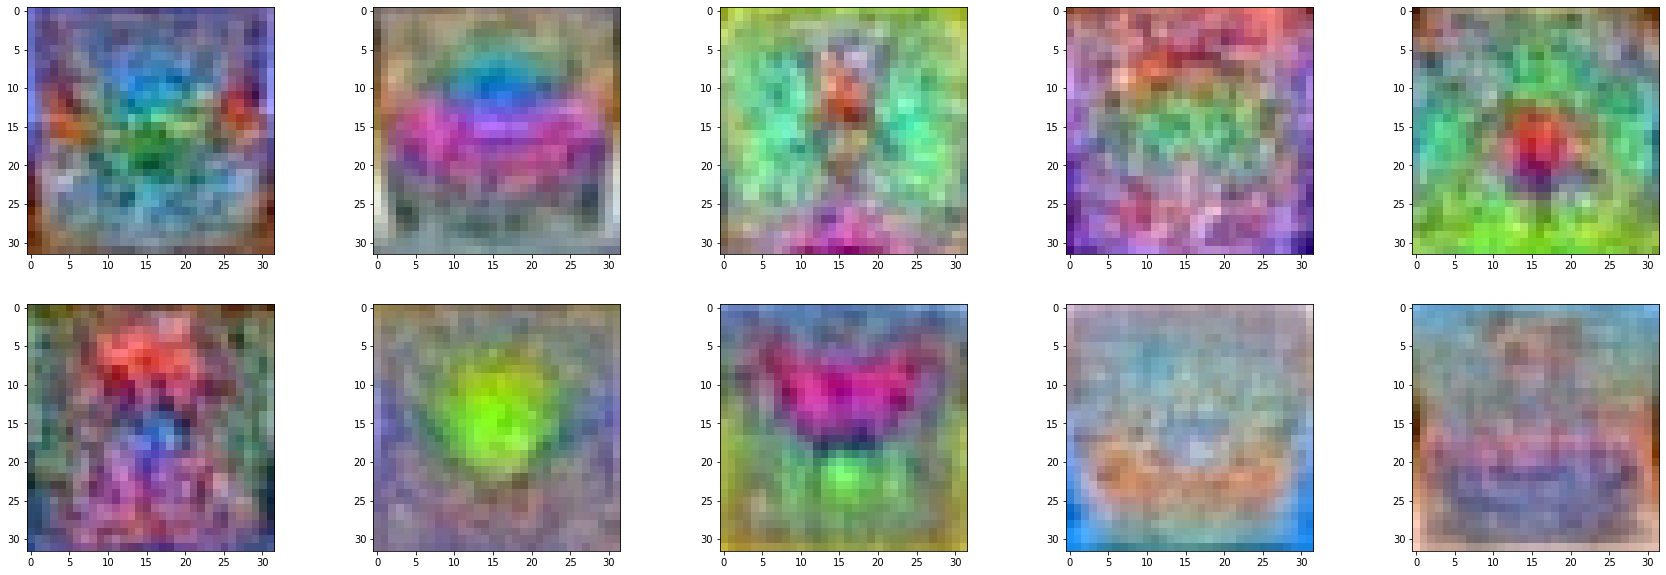

In [12]:
import cv2 as cv
images=[]
for i in range(w1.shape[1]):
    #images.append(np.reshape(w1[:,i]*255,(32,32,3))+np.reshape(mean_image,(32,32,3)))
    temp=np.reshape(w1[:,i]*255,(32,32,3))
    temp=cv.normalize(temp, None, 0, 255, cv.NORM_MINMAX, cv.CV_8U)
    images.append(temp)
fig,ax=plt.subplots(2,5,figsize=(30,10))
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(images[i*5+j],vmin=0,vmax=255)
plt.show()

In [ ]:
train_acc = 1.0 - 1/batch_size*(np.abs(np.argmax(y,axis=1) - np.argmax(y_pred,axis=1))).sum()
train_acc_history.append(train_acc)
#test_acc = 1.0 - 1/Nte*(np.abs(np.argmax(y_test,axis=1) - np.argmax(y_pred,axis=1))).sum()
